<IPython.core.display.Javascript object>


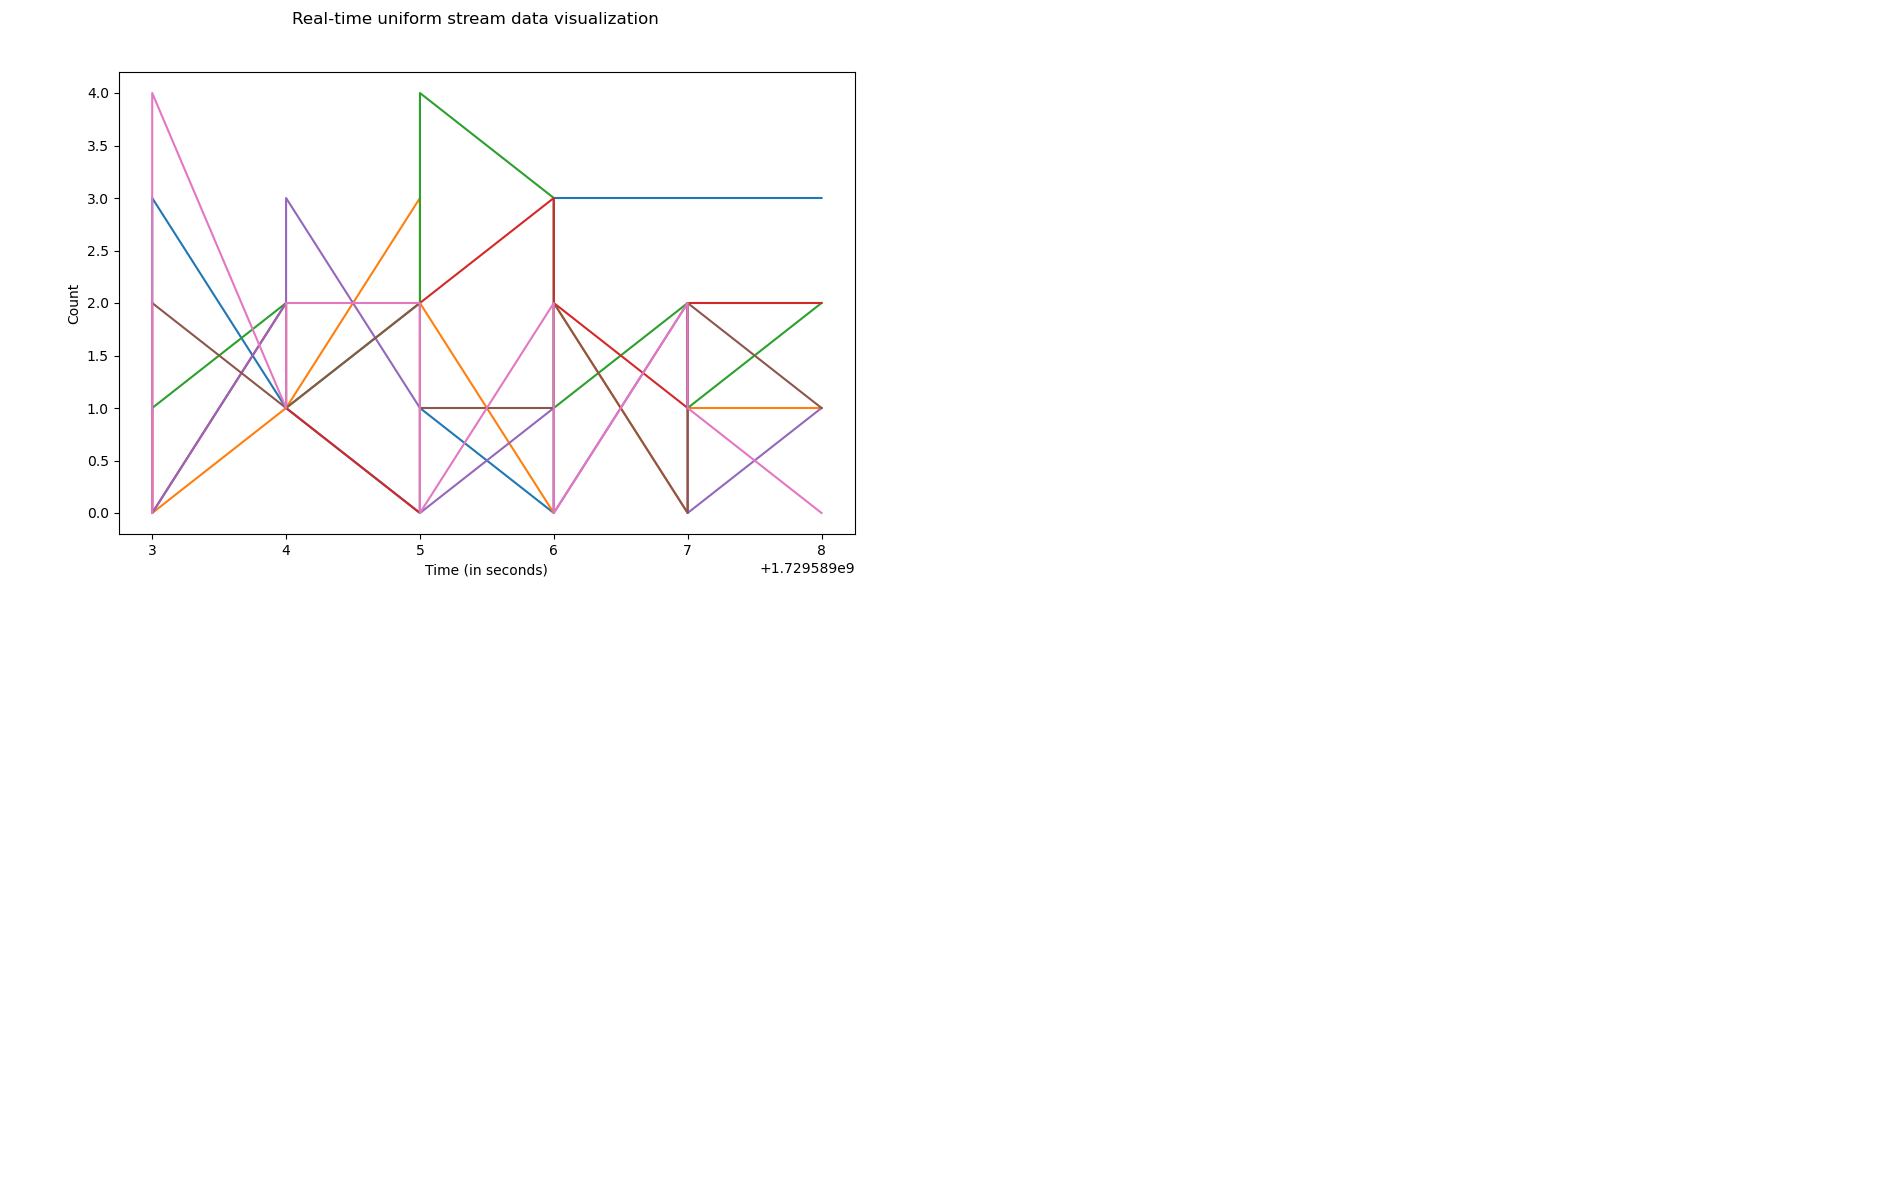

In [ ]:
# import statements
from kafka import KafkaConsumer
import datetime as dt
import matplotlib.pyplot as plt
import json
from json import loads

# this line is needed for the inline display of graphs in Jupyter Notebook
%matplotlib notebook

topic = 'flightTopic'

def connect_kafka_consumer():
    _consumer = None
    try:
         _consumer = KafkaConsumer(topic,
                                   consumer_timeout_ms=10000, # stop iteration if no message after 10 sec
                                   auto_offset_reset='latest', # comment this if you don't want to consume earliest available message
                                   bootstrap_servers=['localhost:9092'],
                                   value_deserializer=lambda x: loads(x.decode('ascii')),
                                   api_version=(0, 10))
    except Exception as ex:
        print('Exception while connecting Kafka')
        print(str(ex))
    finally:
        return _consumer

def init_plots():
    try:
        width = 9.5
        height = 6
        fig = plt.figure(figsize=(width,height)) # create new figure
        ax = fig.add_subplot(111) # adding the subplot axes to the given grid position
        fig.suptitle('Real-time uniform stream data visualization') # giving figure a title
        ax.set_xlabel('Time (in seconds)')
        ax.set_ylabel('Count')        
        fig.show() # displaying the figure
        fig.canvas.draw() # drawing on the canvas
        return fig, ax
    except Exception as ex:
        print(str(ex))
    
def consume_messages(consumer, fig, ax):
    try:
        # container for x and y values
        x, y = [], []
        for message in consumer:
            mon = 0
            tue = 0
            wed = 0 
            thu = 0
            fri = 0
            sat = 0
            sun = 0
            # count total number of flight for each day of week
            for i in range(10):
                day = message.value[i]['DAY_OF_WEEK']
                if day == '1':
                    mon +=1
                elif day == '2':
                    tue +=1
                elif day == '3':
                    wed +=1
                elif day == '4':
                    thu +=1
                elif day == '5':
                    fri +=1
                elif day == '6':
                    sat +=1
                elif day == '7':
                    sun +=1
            # get the timestamp
            ts =  message.value[0]['ts']
            #append to X and Y respectively
            x.append(ts)
            y.append([mon, tue, wed, thu, fri, sat, sun])
            # we start plotting only when we have 10 data points
            if len(y) > 10:
                #plotting
                ax.clear()
                ax.plot(x, y)
                ax.set_xlabel('Time (in seconds)')
                ax.set_ylabel('Count')
                fig.canvas.draw()
                x.pop(0) # removing the item in the first position
                y.pop(0)    
        plt.close('all')
        
    except Exception as ex:
        print(str(ex))
    
if __name__ == '__main__':
    
    consumer = connect_kafka_consumer()
    fig, ax = init_plots()    
    consume_messages(consumer, fig, ax)  